In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [29]:
df = pd.read_csv('diabetes_data.csv')
df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
5,6005,65,0,0,0,0,15.820815,1,17.781024,9.252522,...,0,86.378969,0,0,0,1.535161,9.682226,2.744281,0,Confidential
6,6006,61,1,2,1,3,20.075147,0,1.086479,8.745650,...,0,86.036931,0,0,0,0.578208,1.175504,1.229453,0,Confidential
7,6007,74,1,3,0,3,29.438938,0,6.187378,9.114535,...,0,47.315820,0,0,0,1.659424,2.258377,9.035877,0,Confidential
8,6008,54,0,0,1,2,15.027557,0,19.505734,0.590771,...,0,88.638130,0,0,0,3.675916,2.006186,3.452805,1,Confidential
9,6009,82,1,0,1,1,34.300044,1,15.943844,6.056621,...,0,96.636541,0,0,0,2.567315,4.031643,2.633287,0,Confidential


In [30]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


#### Continuous Variables

- **Age**
- **BMI**
- **AlcoholConsumption**
- **PhysicalActivity**
- **DietQuality**
- **SleepQuality**
- **SystolicBP**
- **DiastolicBP**
- **FastingBloodSugar**
- **HbA1c**
- **SerumCreatinine**
- **BUNLevels**
- **CholesterolTotal**
- **CholesterolLDL**
- **CholesterolHDL**
- **CholesterolTriglycerides**
- **FatigueLevels**
- **QualityOfLifeScore**
- **MedicalCheckupsFrequency**
- **HealthLiteracy**
- **MedicationAdherence** *(target)*

---

#### Discrete (Categorical/Binary) Variables

- **Gender**
- **Ethnicity**
- **SocioeconomicStatus**
- **EducationLevel**
- **Smoking**
- **FamilyHistoryDiabetes**
- **GestationalDiabetes**
- **PolycysticOvarySyndrome**
- **PreviousPreDiabetes**
- **Hypertension**
- **AntihypertensiveMedications**
- **Statins**
- **AntidiabeticMedications**
- **FrequentUrination**
- **ExcessiveThirst**
- **UnexplainedWeightLoss**
- **BlurredVision**
- **SlowHealingSores**
- **TinglingHandsFeet**
- **HeavyMetalsExposure**
- **OccupationalExposureChemicals**
- **WaterQuality**
- **Diagnosis**


#### Given that medical adherence is our target variable, we will first make a distribution plot to see how it is distributed.

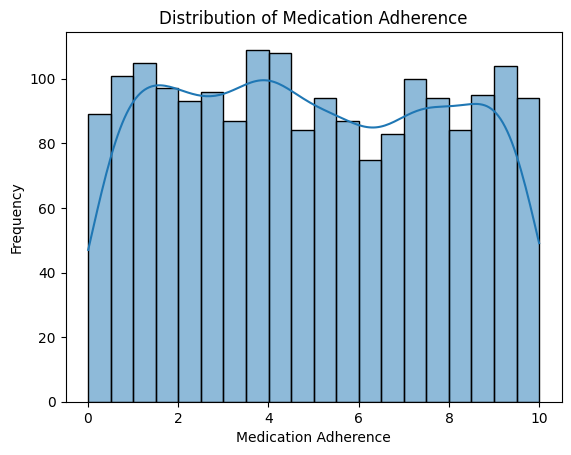

In [31]:
sns.histplot(df, x='MedicationAdherence', bins=20, kde=True)
plt.title('Distribution of Medication Adherence')
plt.xlabel('Medication Adherence')
plt.ylabel('Frequency')
plt.show()

In [32]:
def preprocess_adherence_data(df):
  
    # Step 1: Create the binary label
    df['AdherenceGroup'] = pd.cut(df['MedicationAdherence'], bins=[0, 3, 7, 10], labels=[0, 1, 2])
    df.drop(columns=['MedicationAdherence'], inplace=True)

    identifier_columns = ['PatientID', 'DoctorInCharge']
    df = df.drop(identifier_columns, axis=1)
    return df

df = preprocess_adherence_data(df)

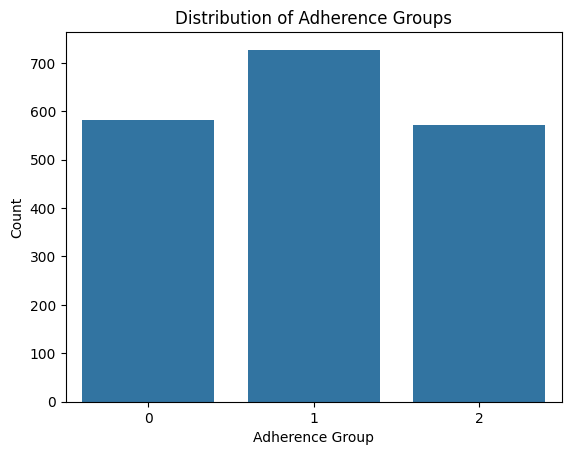


Adherence Group Distribution:
AdherenceGroup
1    727
0    581
2    571
Name: count, dtype: int64


In [33]:
sns.countplot(x='AdherenceGroup', data=df)
plt.title('Distribution of Adherence Groups')
plt.xlabel('Adherence Group')
plt.ylabel('Count')
plt.show()
print("\nAdherence Group Distribution:")
print(df['AdherenceGroup'].value_counts())

In [34]:
# List of multi-categorical variables to encode
multi_categoricals = ['Ethnicity']

# One-hot encode
df = pd.get_dummies(df, columns=multi_categoricals, drop_first=True)

print(df.shape)
df.head()


(1879, 46)


,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,HealthLiteracy,Diagnosis,AdherenceGroup,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,44,0,2,1,32.985284,1,4.499365,2.443385,4.898831,4.049885,...,0,0,0,1.782724,7.211349,1,1,True,False,False
1,51,1,1,2,39.916764,0,1.578919,8.301264,8.941093,7.508150,...,0,0,1,3.381070,5.024612,1,1,False,False,False
2,89,1,1,3,19.782251,0,1.177301,6.103395,7.722543,7.708387,...,0,0,0,2.701019,7.034944,0,2,False,False,False
3,21,1,1,2,32.376881,1,1.714621,8.645465,4.804044,6.286548,...,0,0,1,1.409056,4.717774,0,1,True,False,False
4,27,1,1,3,16.808600,0,15.462549,4.629383,2.532756,9.771125,...,0,0,0,1.218452,7.887940,0,1,False,False,False


#### Defining Features (X) and Target (y)

In [35]:
X = df.drop(columns=['AdherenceGroup'])
y = df['AdherenceGroup'] 

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1879, 45)
Shape of y: (1879,)


In [47]:
# 1)  First split off the 10 % test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.10,
    random_state=42,
    stratify=y               # keep class proportions
)

# 2)  Split the remaining 90 % into 80 % train and 10 % validation
#     0.1111 ≈ 1/9 → (90% * 1/9 ≈ 10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1111,
    random_state=42,
    stratify=y_temp
)

# 3)  Quick check of class balance
def show_dist(title, labels):
    print(f"{title} distribution:")
    print(labels.value_counts(normalize=True).sort_index(), '\n')

show_dist("Train", y_train)
show_dist("Validation", y_val)
show_dist("Test", y_test)

print(f"Train: {X_train.shape}  |  Val: {X_val.shape}  |  Test: {X_test.shape}")


Train distribution:
AdherenceGroup
0    0.309381
1    0.386560
2    0.304059
Name: proportion, dtype: float64 

Validation distribution:
AdherenceGroup
0    0.308511
1    0.388298
2    0.303191
Name: proportion, dtype: float64 

Test distribution:
AdherenceGroup
0    0.308511
1    0.388298
2    0.303191
Name: proportion, dtype: float64 

Train: (1503, 45)  |  Val: (188, 45)  |  Test: (188, 45)


#### Initial Model (without any hyperparameter tuning)

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 1)  Identify column types
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.columns.difference(num_cols)

print(f"Numeric : {len(num_cols)}   |   Categorical : {len(cat_cols)}")

# 2)  One-hot encode categorical columns on TRAIN
X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=False)

# 3)  Apply the *same* dummies to VAL and TEST
X_val_enc  = pd.get_dummies(X_val,  columns=cat_cols, drop_first=False)
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=False)

# Align sets so they share identical columns (missing → filled with 0)
X_val_enc  = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

# 4)  Fit Random Forest
rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight='balanced',
        random_state=42
     )
rf.fit(X_train_enc, y_train)

# 5)  Predict & evaluate on the validation set
y_val_pred = rf.predict(X_val_enc)

print("Validation accuracy :", round(accuracy_score(y_val, y_val_pred), 4))
print("Validation macro-F1 :", round(f1_score(y_val, y_val_pred, average='macro'), 4))
print("\nConfusion matrix (val):")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification report (val):")
print(classification_report(y_val, y_val_pred, target_names=['Low','Med','High']))


Numeric : 42   |   Categorical : 3
Validation accuracy : 0.3936
Validation macro-F1 : 0.313

Confusion matrix (val):
[[ 7 47  4]
 [ 6 58  9]
 [13 35  9]]

Classification report (val):
              precision    recall  f1-score   support

         Low       0.27      0.12      0.17        58
         Med       0.41      0.79      0.54        73
        High       0.41      0.16      0.23        57

    accuracy                           0.39       188
   macro avg       0.36      0.36      0.31       188
weighted avg       0.37      0.39      0.33       188



Top 10 features:
                     feature  importance
0  CholesterolTriglycerides    0.047441
1            CholesterolHDL    0.044916
2        QualityOfLifeScore    0.043452
3                       BMI    0.043285
4        AlcoholConsumption    0.043104
5                     HbA1c    0.042988
6             FatigueLevels    0.042459
7            CholesterolLDL    0.042311
8          CholesterolTotal    0.042146
9              SleepQuality    0.042049 

Bottom 10 features:
                           feature  importance
38              Ethnicity_3_False    0.004358
39                  BlurredVision    0.004356
40  OccupationalExposureChemicals    0.004355
41            GestationalDiabetes    0.004304
42               Ethnicity_2_True    0.004072
43              Ethnicity_2_False    0.003960
44               Ethnicity_3_True    0.003887
45               SlowHealingSores    0.003845
46            HeavyMetalsExposure    0.002966
47        PolycysticOvarySyndrome    0.002538


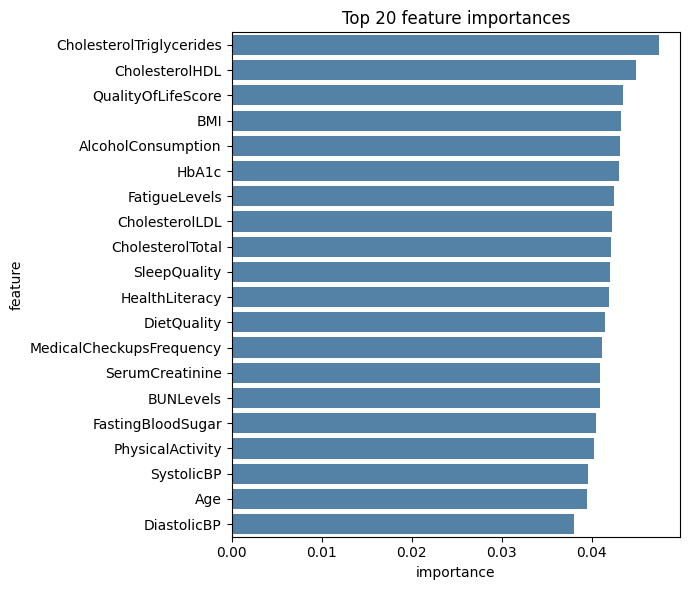

In [55]:
# 1) Build a DataFrame with names + importances
feat_imp = (
    pd.DataFrame({
        'feature': X_train_enc.columns,
        'importance': rf.feature_importances_
    })
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
)

# 2) Quick look at the head / tail
print("Top 10 features:\n", feat_imp.head(10), '\n')
print("Bottom 10 features:\n", feat_imp.tail(10))

plt.figure(figsize=(7,6))
sns.barplot(y='feature', x='importance', data=feat_imp.head(20), color='steelblue')
plt.title('Top 20 feature importances')
plt.tight_layout()
plt.show()

In [ ]:
# ----- decide threshold
thresh = 0.01
weak_cols = feat_imp.loc[feat_imp['importance'] < thresh, 'feature'].tolist()
print(f"Columns to drop ({len(weak_cols)}):", weak_cols[:15])

# ----- drop from all splits
X_train_red = X_train_enc.drop(columns=weak_cols)
X_val_red   = X_val_enc.drop(columns=weak_cols)
X_test_red  = X_test_enc.drop(columns=weak_cols)


Columns to drop (26): ['Statins', 'Gender', 'AntihypertensiveMedications', 'Smoking', 'ExcessiveThirst', 'Diagnosis', 'AntidiabeticMedications', 'FamilyHistoryDiabetes', 'WaterQuality', 'PreviousPreDiabetes', 'FrequentUrination', 'Hypertension', 'Ethnicity_1_False', 'UnexplainedWeightLoss', 'TinglingHandsFeet']
Pruned model  –  val accuracy : 0.4255
Pruned model  –  macro-F1     : 0.3777
[[14 42  2]
 [ 7 54 12]
 [10 35 12]]


#### 2nd Model (after feature importance analysis)

In [59]:
# ----- re-train a smaller Random Forest
rf_red = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf_red.fit(X_train_red, y_train)

# ----- evaluate on validation
y_val_pred_red = rf_red.predict(X_val_red)
print("Pruned model  –  val accuracy :", round(accuracy_score(y_val, y_val_pred_red), 4))
print("Pruned model  –  macro-F1     :", round(f1_score(y_val, y_val_pred_red, average='macro'), 4))
print(confusion_matrix(y_val, y_val_pred_red))
print(classification_report(y_val, y_val_pred_red, target_names=['Low','Med','High']))

Pruned model  –  val accuracy : 0.4255
Pruned model  –  macro-F1     : 0.3777
[[14 42  2]
 [ 7 54 12]
 [10 35 12]]
              precision    recall  f1-score   support

         Low       0.45      0.24      0.31        58
         Med       0.41      0.74      0.53        73
        High       0.46      0.21      0.29        57

    accuracy                           0.43       188
   macro avg       0.44      0.40      0.38       188
weighted avg       0.44      0.43      0.39       188



#### 3rd Model (after hyperparameter tuning)

In [61]:
param_grid = {
    'n_estimators'     : [300, 500],
    'max_depth'        : [8, 12, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features'     : ['sqrt', 'log2']
}

base_rf = RandomForestClassifier(
            class_weight='balanced',
            random_state=42
          )

gs = GridSearchCV(
        estimator=base_rf,
        param_grid=param_grid,
        cv=5,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=0
     )
gs.fit(X_train_red, y_train)

best_rf = gs.best_estimator_
print("Best params:", gs.best_params_, '\n')

y_val_pred = best_rf.predict(X_val_red)
print("VALIDATION")
print("  accuracy :", round(accuracy_score(y_val, y_val_pred),4))
print("  macro-F1 :", round(f1_score(y_val, y_val_pred, average='macro'),4))
print(confusion_matrix(y_val, y_val_pred), '\n')

y_test_pred = best_rf.predict(X_test_red)
print("TEST")
print("  accuracy :", round(accuracy_score(y_test, y_test_pred),4))
print("  macro-F1 :", round(f1_score(y_test, y_test_pred, average='macro'),4))
print(confusion_matrix(y_test, y_test_pred), '\n')
print(classification_report(y_test, y_test_pred,
                            target_names=['Low','Med','High']))

Best params: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500} 

VALIDATION
  accuracy : 0.3511
  macro-F1 : 0.3505
[[25 22 11]
 [22 24 27]
 [17 23 17]] 

TEST
  accuracy : 0.3245
  macro-F1 : 0.318
[[17 22 19]
 [23 29 21]
 [22 20 15]] 

              precision    recall  f1-score   support

         Low       0.27      0.29      0.28        58
         Med       0.41      0.40      0.40        73
        High       0.27      0.26      0.27        57

    accuracy                           0.32       188
   macro avg       0.32      0.32      0.32       188
weighted avg       0.33      0.32      0.33       188



#### 4th Model (further hyperparameter tuning)

In [62]:
rf2 = RandomForestClassifier(
        n_estimators=600,
        max_depth=None,            # let trees grow
        min_samples_leaf=2,
        class_weight={0:2, 1:1, 2:2},   # emphasise Low & High
        random_state=42
)
rf2.fit(X_train_red, y_train)

y_val_pred2  = rf2.predict(X_val_red)
y_test_pred2 = rf2.predict(X_test_red)

print("VALIDATION accuracy :", round(accuracy_score(y_val, y_val_pred2),4))
print("VALIDATION macro-F1 :", round(f1_score(y_val, y_val_pred2, average='macro'),4))
print(confusion_matrix(y_val, y_val_pred2), '\n')

print("TEST accuracy :", round(accuracy_score(y_test, y_test_pred2),4))
print("TEST macro-F1 :", round(f1_score(y_test, y_test_pred2, average='macro'),4))
print(confusion_matrix(y_test, y_test_pred2))
print(classification_report(y_test, y_test_pred2,
                            target_names=['Low','Med','High']))


VALIDATION accuracy : 0.3936
VALIDATION macro-F1 : 0.3868
[[22 25 11]
 [16 34 23]
 [19 20 18]] 

TEST accuracy : 0.3298
TEST macro-F1 : 0.3167
[[17 20 21]
 [21 33 19]
 [19 26 12]]
              precision    recall  f1-score   support

         Low       0.30      0.29      0.30        58
         Med       0.42      0.45      0.43        73
        High       0.23      0.21      0.22        57

    accuracy                           0.33       188
   macro avg       0.32      0.32      0.32       188
weighted avg       0.32      0.33      0.33       188

